In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `~/git/BigRiverQTL.jl`


In [2]:
Pkg.instantiate()

In [3]:
using Revise

In [4]:
# Libraries

using BigRiverQTLPlots
using Random, Statistics
using Plots
using Helium
using BigRiverQTL
using CSV
using DataFrames
using BulkLMM


ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


In [5]:
##############
# BXD spleen #
##############

########
# Data #
########
data_dir = joinpath(@__DIR__, "../data/BXD/");
file = joinpath(data_dir, "bxd.json");

In [6]:
# Transforming data to a optimised and accessible data type
data = get_geneticstudydata(file);

In [7]:
# Data types
gInfo=data.gmap;
pInfo=data.phenocov;
pheno=data.pheno;
pheno=data.pheno.val;
geno=reduce(hcat, data.geno.val);
geno_processed=convert(Array{Float64}, geno);

In [8]:
#################
# Preprocessing #
#################
traitID = 1112;
pheno_y = pheno[:, traitID];
pheno_y2=ones(length(pheno_y));
idx_nothing = findall(x->x!=nothing,pheno_y)
pheno_y2[idx_nothing]=pheno_y[idx_nothing];

In [9]:
###########
# Kinship #
###########
kinship = kinship_gs(geno_processed,.99);

In [10]:
########
# Scan #
########

single_results_perms = scan(
	pheno_y2,
	geno_processed,
	kinship;
	permutation_test = true,
	nperms = 1000,
);

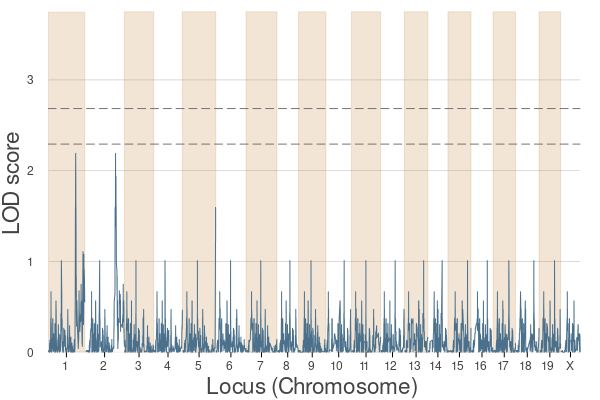

In [11]:
#########
# Plots #
#########


# QTL plots
plot_QTL(single_results_perms, gInfo, mbColname = "Pos")





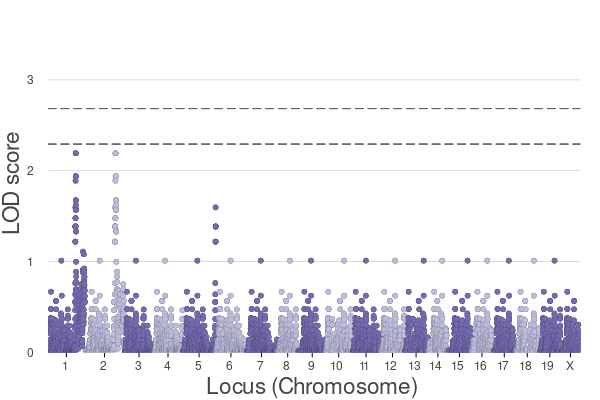

In [15]:
# Manhattan plots
plot_manhattan(single_results_perms, gInfo, mbColname = "Pos")